# Introduction

Data is taken from [here](https://www.kaggle.com/siddheshshelke/tmdbmovierating-sample)  <br>
You can read this article [here](https://www.analyticsvidhya.com/blog/2021/09/hand-made-visualizations-in-python-using-cutecharts-library/)

In [1]:
import cutecharts.charts as ctc
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['popularity'] = round(df['popularity'], 2)

In [4]:
df.drop(['imdb_id', 'homepage', 'budget_adj','revenue_adj'], axis=1, inplace=True)

In [5]:
df['tagline'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True) 
df['cast'].fillna('missing',inplace=True)
df['director'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['overview'].fillna('missing',inplace=True)

In [6]:
df.drop(df[(df['budget']==0) & (df['revenue']==0)].index, inplace=True)

## Pie & Donut Chart

In [7]:
df_year = df['release_year'].value_counts().reset_index().sort_values(by='index', ascending=False)[:5].rename(columns={'index':'release_year','release_year':'Count'})
chart = ctc.Pie('Top 5 years', width='600px', height='300px')
chart.set_options(labels=list(df_year['release_year']), inner_radius=0)
chart.add_series(list(df_year['Count']))
chart.render_notebook()

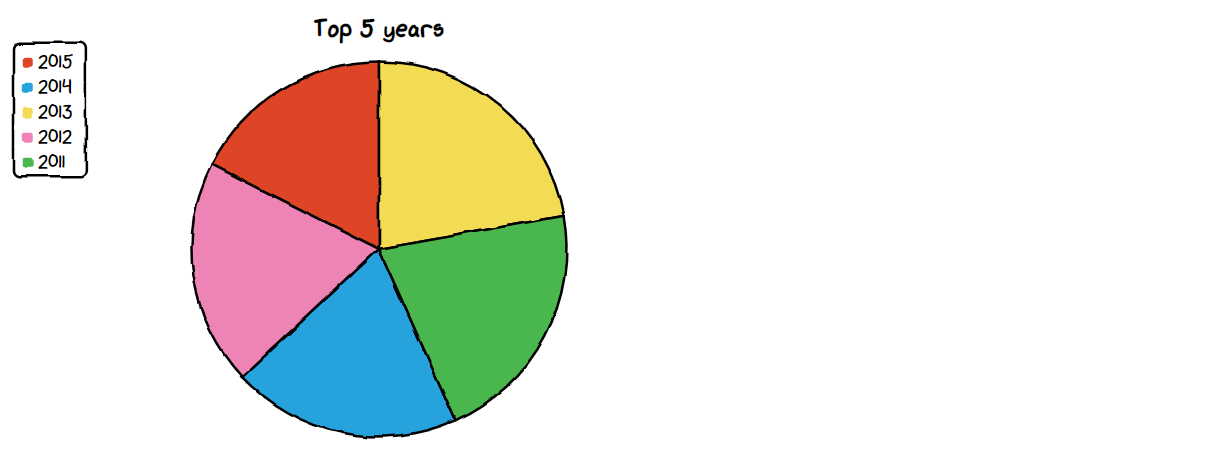

In [8]:
df_year = df['release_year'].value_counts().reset_index().sort_values(by='index', ascending=False)[:5].rename(columns={'index':'release_year','release_year':'Count'})
chart = ctc.Pie('Top 5 years', width='600px', height='300px')
chart.set_options(labels=list(df_year['release_year']), inner_radius=0.8)
chart.add_series(list(df_year['Count']))
chart.render_notebook()

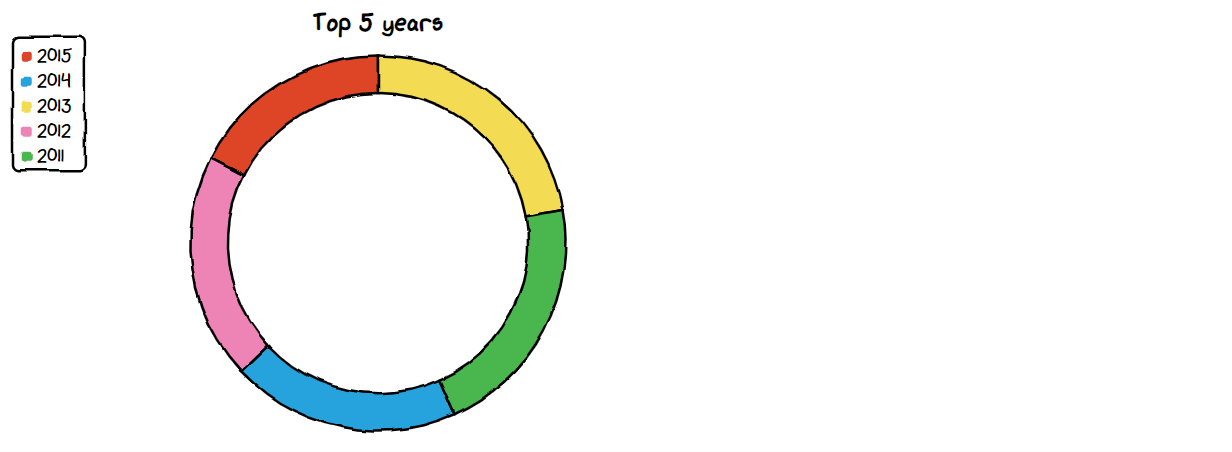

## Bar Chart

In [9]:
def count_genre(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

In [10]:
df_genre_movies = count_genre('genres')
df_genre_movies = pd.DataFrame(df_genre_movies).reset_index().rename(columns={'index':'Drama', 0:'Count'})

In [11]:
from cutecharts.faker import Faker

chart = ctc.Bar('Top Movie Geners', width='600px', height='200px')
chart.set_options(labels=list(df_genre_movies['Drama'][:7]),
x_label='Drama',
y_label='Count',
colors=Faker.colors
)

chart.add_series('Geners',list(df_genre_movies['Count'][:7]))
chart.render_notebook()

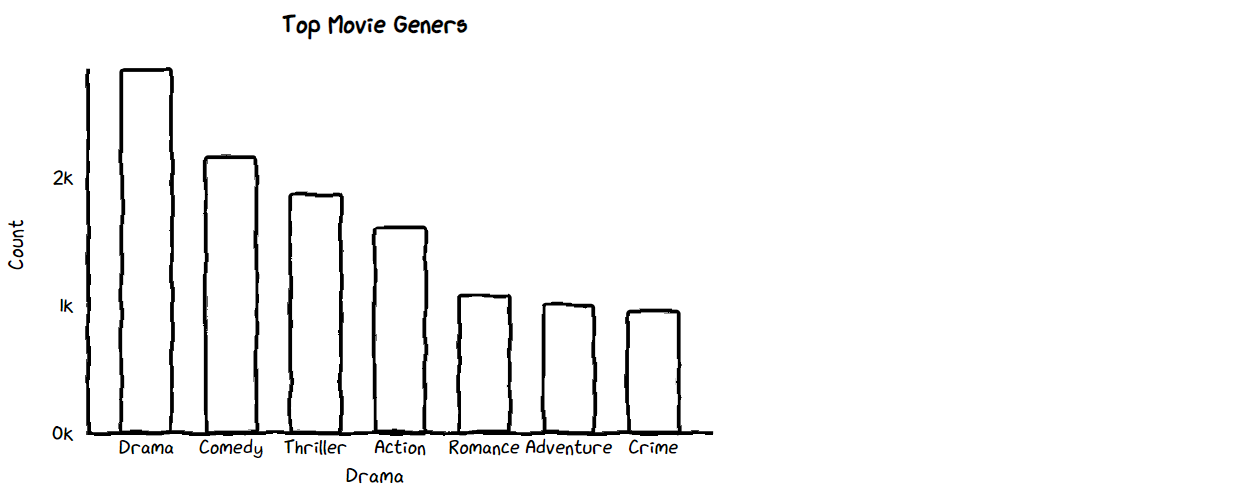

In [12]:
chart = ctc.Bar('Top Movie Geners', width='600px', height='200px')
chart.set_options(labels=list(df_genre_movies['Drama'][:7]),
x_label='Drama',
y_label='Count',
colors=['#FFF1C9', '#F7B7A3', '#EA5F89', '#9B3192', '#57167E', '#47B39C','#00529B']
)
chart.add_series('Geners',list(df_genre_movies['Count'][:7]))
chart.render_notebook()

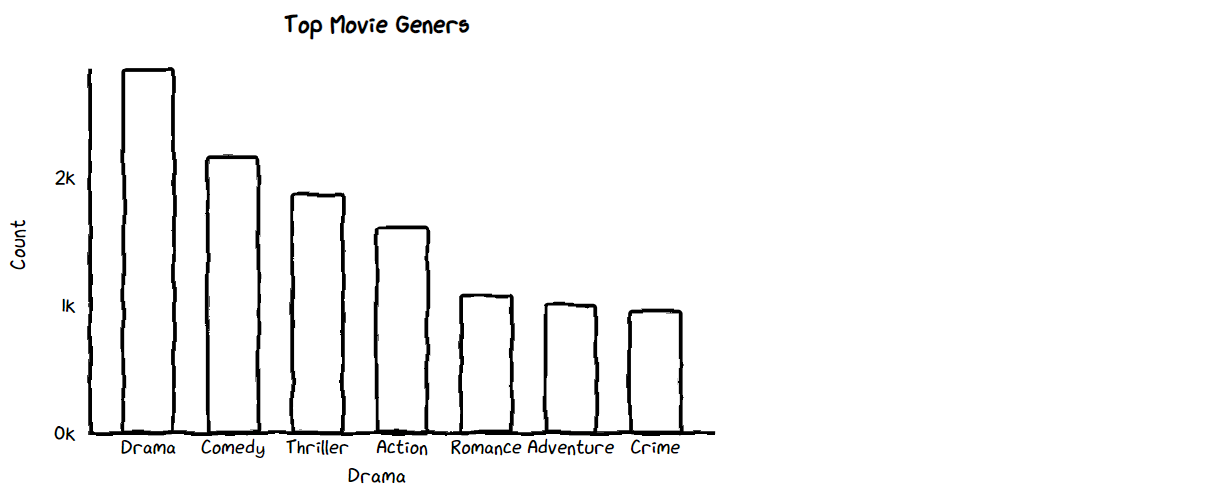

## Line Chart

In [13]:
data = df.groupby('release_year').count()['id'].reset_index().tail(16)

In [14]:
chart = ctc.Line("Impact of Movie over the years of 20's", width='700px', height='200px')
chart.set_options(labels=list(data['release_year']),
                  x_label='Years',
                  y_label='Count',
 )
chart.add_series('Years',list(data['id']))
chart.render_notebook()

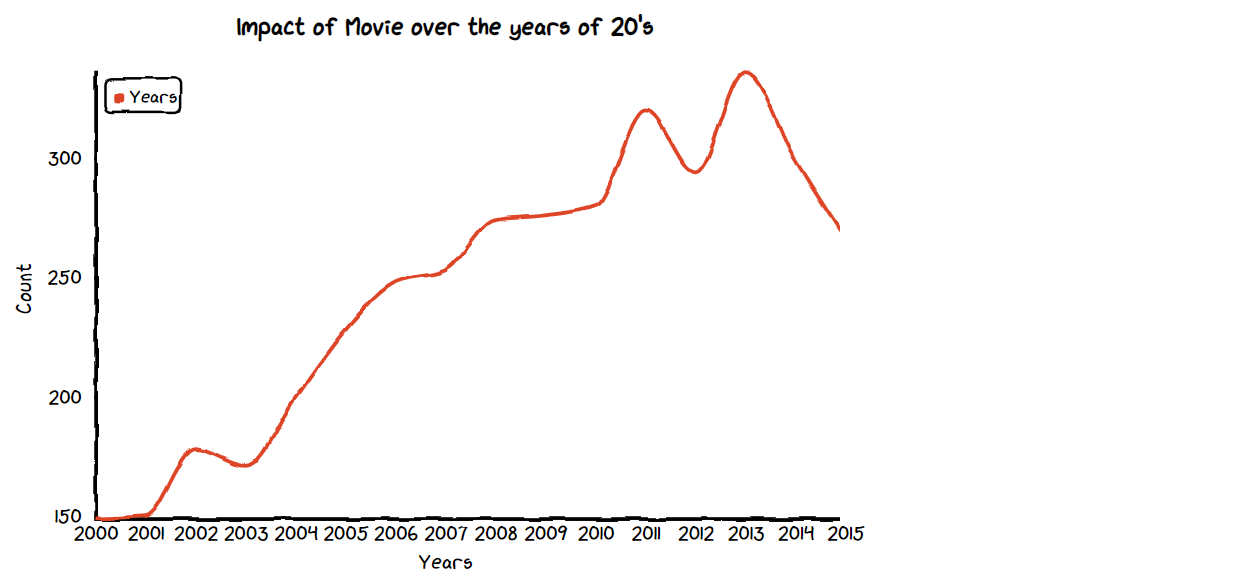

## Scatter Chart

In [15]:
chart = ctc.Scatter("Helps to gain insights like if movies with higher budget have high popularity", width='700px', height='200px')
chart.set_options(x_label='Popularity',
                  y_label='Budget',
                  dot_size=1,
                  colors=['#47B39C']
 )
chart.add_series('Popularity vs Budget', [(z[0], z[1]) for z in list(zip(df['popularity'],df['budget']))])
chart.render_notebook()

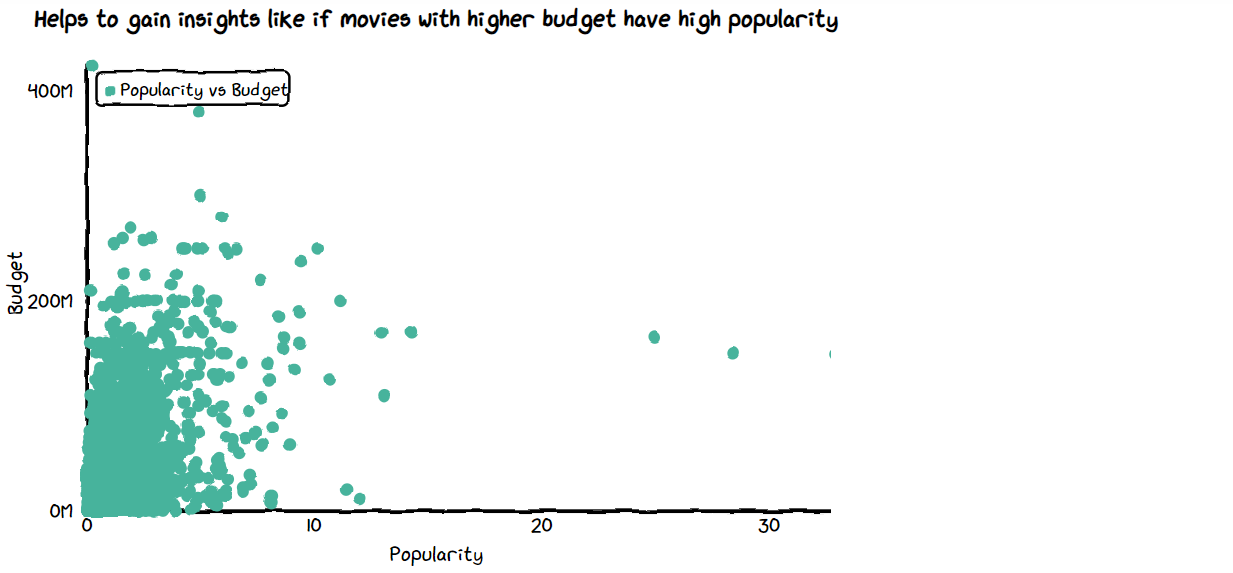

## Spider Chart

In [16]:
data = {'Day': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
        'This week': [12, 10, 9, 9, 10, 3, 3], 
        'Last week': [15, 12, 8, 9, 11, 4, 3]
       }
df_coffee = pd.DataFrame(data, columns = ['Day', 'This week', 'Last week'])

In [17]:
chart = ctc.Radar('Cups of coffee consumed per day')
chart.set_options(
    labels=list(df_coffee['Day']), 
    is_show_legend=True,
    legend_pos='upRight' 
    )
chart.add_series('This Week', list(df_coffee['This week'])) 
chart.add_series('Last Week', list(df_coffee['Last week']))
chart.render_notebook()

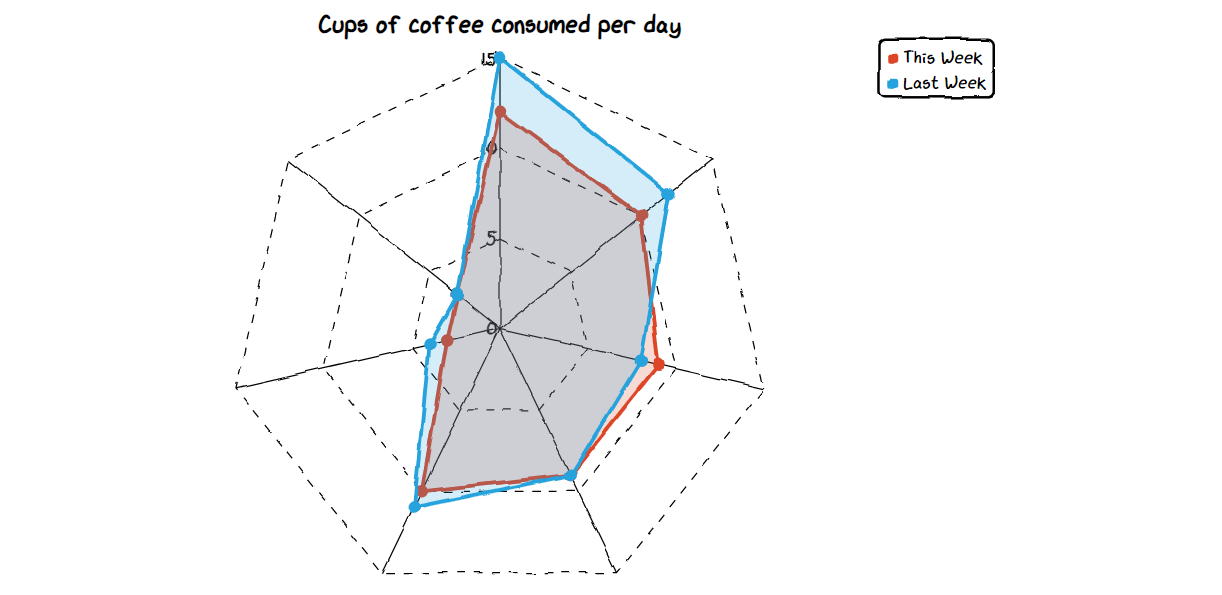